In [2]:
!pip install pymysql

In [13]:
import os
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

# CONFIGURAR / ADAPTAR ...
host = "localhost"
port = 3306
user = "root"
password = ""
database = "universidade_alunos"

conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db=database,
    charset='utf8mb4')

# ADAPTAR
df = pd.read_sql_query("SELECT * FROM aluno", conn)

df.tail(10)

C:\Users\Rodrigo Pereira\AppData\Local\Temp\ipykernel_11176\819967281.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM aluno", conn)


,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
1750,200719,Maria João,Pereira,Psicologia,10,1,19.0
1751,20031555,Rodrigo,da Silva,Psicologia,10,1,19.0
1752,2003675,Marta,Capicua,Comunicação,19,1,10.0
1753,20201230,Lucas,Sampaio,Psicologia,20,1,12.0
1754,2003850,Rita,Pereira,Comunicação,19,1,11.0
1755,2019869,Alice,Laranjeira,Informática,11,1,17.0
1756,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1757,20071160,Lucas,Capicua,Informática,12,1,20.0
1758,2020288,Pedro,Capicua,Comunicação,13,1,19.0
1759,2019163820,Diana,da Silva,Comunicação,13,1,18.0


In [14]:
df.head(10)

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
5,2020151,Beatriz,Laranjeira,Psicologia,10,1,18.0
6,20191405,Diana,Morais,Psicologia,19,1,11.0
7,2022311,Catarina,Cintra,Comunicação,20,1,10.0
8,20071496,Leonardo,Laranjeira,Comunicação,11,1,17.0
9,2019178,Marta,Pires,Informática,14,1,14.0


In [15]:
df.tail(7)

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
1753,20201230,Lucas,Sampaio,Psicologia,20,1,12.0
1754,2003850,Rita,Pereira,Comunicação,19,1,11.0
1755,2019869,Alice,Laranjeira,Informática,11,1,17.0
1756,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1757,20071160,Lucas,Capicua,Informática,12,1,20.0
1758,2020288,Pedro,Capicua,Comunicação,13,1,19.0
1759,2019163820,Diana,da Silva,Comunicação,13,1,18.0


In [16]:
df.isnull()

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1755,False,False,False,False,False,False,False
1756,False,False,False,False,False,False,False
1757,False,False,False,False,False,False,False
1758,False,False,False,False,False,False,False


In [17]:
df.isnull().sum()

nr_aluno            0
nome                0
apelido             0
curso               4
media_entrada       0
curso_concluido     0
media_final        17
dtype: int64

In [18]:
df.dropna()

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
...,...,...,...,...,...,...,...
1755,2019869,Alice,Laranjeira,Informática,11,1,17.0
1756,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1757,20071160,Lucas,Capicua,Informática,12,1,20.0
1758,2020288,Pedro,Capicua,Comunicação,13,1,19.0


In [23]:
correlacao = df['media_entrada'].corr(df['media_final'])

print("Correlação entre média de entrada e média Final da licenciatura:", correlacao)

Correlação entre média de entrada e média Final da licenciatura: -0.6964566863805907


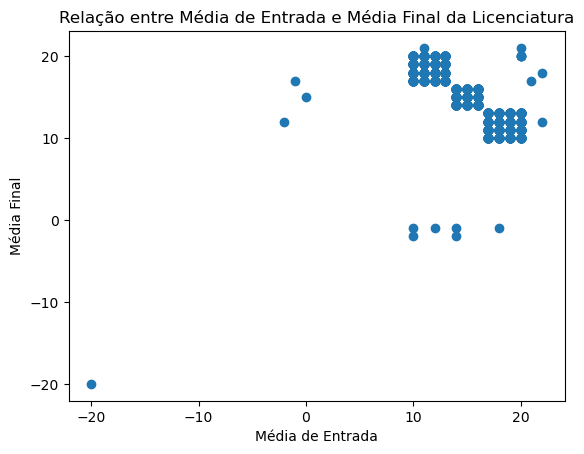

In [40]:
plt.scatter(df['media_entrada'], df['media_final'])
plt.title('Relação entre Média de Entrada e Média Final da Licenciatura')
plt.xlabel('Média de Entrada')
plt.ylabel('Média Final')
plt.show()

In [41]:
# Definir uma regra para excluir os valores fora do intervalo desejado na coluna 'media_final'
dados = dados.loc[(dados['media_final'] >= 0) & (dados['media_final'] <= 20) & 
                  (dados['media_entrada'] >= 0) & (dados['media_entrada'] <= 20)]

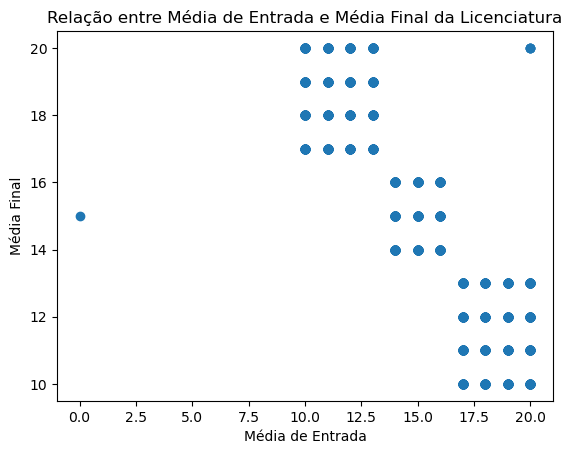

In [42]:
plt.scatter(dados['media_entrada'], dados['media_final'])
plt.title('Relação entre Média de Entrada e Média Final da Licenciatura')
plt.xlabel('Média de Entrada')
plt.ylabel('Média Final')
plt.show()